This ia a practice

In [9]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm

# supress the warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#import the dataset

advertising = pd.read_csv("advertising.csv")

In [25]:
advertising

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [12]:
# peeking the data

advertising.shape

(200, 5)

In [13]:
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [14]:
advertising.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


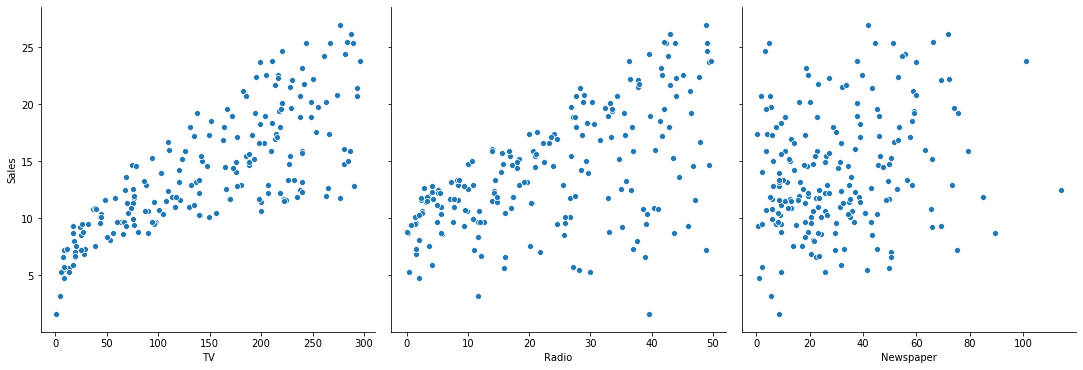

In [15]:
#visualization

sns.pairplot(advertising, x_vars=['TV','Radio', 'Newspaper'], y_vars= 'Sales',size = 5, kind = "scatter")

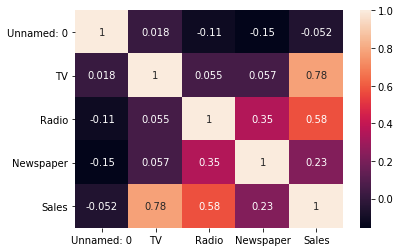

In [16]:
sns.heatmap(advertising.corr(), annot = True)
plt.show()

In [17]:
X = advertising['TV']
Y = advertising['Sales']

In [18]:
#Splitting the data into train and test(with split ratio 80:20)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y , train_size = 0.8, test_size = 0.2, random_state = 5)

#randon to select that No

In [19]:
X_train

159    131.7
62     239.3
166     17.9
45     175.1
23     228.3
       ...  
73     129.4
144     96.2
118    125.7
189     18.7
99     135.2
Name: TV, Length: 160, dtype: float64

In [20]:
X_test.head()

119     19.4
77     120.5
148     38.0
149     44.7
154    187.8
Name: TV, dtype: float64

In [21]:
y_train.head()

159    12.9
62     15.7
166     8.0
45     14.9
23     15.5
Name: Sales, dtype: float64

In [22]:
y_test.head()

119     6.6
77     14.2
148    10.9
149    10.1
154    15.6
Name: Sales, dtype: float64

In [23]:
# adding to get a constant(to get an intercept)
X_train_sm = sm.add_constant(X_train)

In [26]:
# fitting the regression model using OLS(of sm)

lr = sm.OLS(y_train, X_train_sm).fit()
lr.params

const    6.894375
TV       0.048660
dtype: float64

In [27]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.635
Model:                            OLS   Adj. R-squared:                  0.633
Method:                 Least Squares   F-statistic:                     275.5
Date:                Mon, 22 Feb 2021   Prob (F-statistic):           1.87e-36
Time:                        00:10:04   Log-Likelihood:                -411.30
No. Observations:                 160   AIC:                             826.6
Df Residuals:                     158   BIC:                             832.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.8944      0.490     14.078      0.000       5.927       7.862
TV             0.0487      0.003     16.597      0.000       0.043       0.054
==============================================================================
Omnibus:                        0.157   Durbin-Watson:                   1.708
Prob(Omnibus):                  0.925   Jarque-Bera (JB):                0.220
Skew:                          -0.073   Prob(JB):                        0.896
Kurtosis:                       2.892   Cond. No.                         325.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

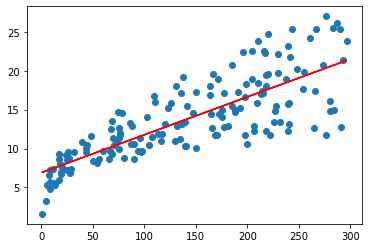

In [28]:
# visualization the regression line =  Best fit line
plt.scatter(X_train, y_train)
plt.plot(X_train, 6.8944 + 0.0487 * X_train, 'r')


In [29]:
#Error analysis

y_train_pred = lr.predict(X_train_sm)

res  = (y_train - y_train_pred)


Text(0, 0.5, 'freq')

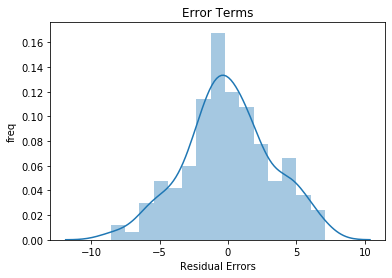

In [30]:
#plotting the histogram of errors

sns.distplot(res, bins = 15)
plt.title("Error Terms")
plt.xlabel("Residual Errors")
plt.ylabel("freq")

In [31]:
# Adding constant to test data

X_test_sm = sm.add_constant(X_test)

In [32]:
#predicting

y_test_pred = lr.predict(X_test_sm)

In [35]:
res_test = (y_test - y_test_pred)

Text(0, 0.5, 'freq')

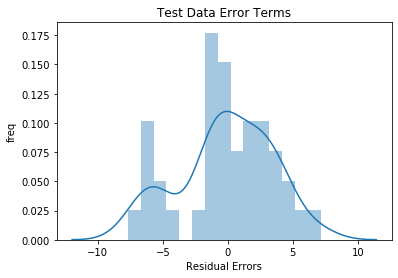

In [36]:
#plotting the histogram of errors

sns.distplot(res_test, bins = 15)
plt.title("Test Data Error Terms")
plt.xlabel("Residual Errors")
plt.ylabel("freq")

In [39]:
from sklearn.metrics import r2_score

r_sq = r2_score(y_test, y_test_pred)
r_sq

0.49907847915124537

In [40]:
# change to 70 : 30 on the above

In [41]:
# regression line we need to plot for test data

In [51]:
#Splitting the data into train and test(with split ratio 80:20)

from sklearn.model_selection import train_test_split
X_train_lm, X_test_lm, y_train_lm, y_test_lm = train_test_split(X, Y , train_size = 0.7, test_size = 0.3, random_state = 5)

In [52]:
X_train_lm = X_train_lm.values.reshape(-1,1)
X_test_lm = X_test_lm.values.reshape(-1,1)

In [53]:
#method 2

from sklearn.linear_model import LinearRegression

lm = LinearRegression()

lm.fit(X_train_lm, y_train_lm)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [54]:
print(lm.intercept_)

6.745302251222065


In [55]:
print(lm.coef_)

[0.05024351]


In [56]:
y_train_pred = lm.predict(X_train_lm)
y_test_pred = lm.predict(X_test_lm)


In [57]:
print(r2_score(y_train_lm, y_train_pred))

0.6411433688483876


In [59]:
print(r2_score(y_test_lm, y_test_pred))

0.5111616978794153


In [ ]:
# assignment :adj R2,TV,TV+Radio (R2,adj R2)